In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Maximum-likelihood estimate (MLE) of a straight-line model

Let's create a simple dataset $\{x_i, y_i, \sigma_y\}$ and solve for the *best-fit* line to the data $$y = a + bx$$ by maximizing the likelihood, which is equivalent to minimizing the $\chi^2$.

In [2]:
# This is very rougly a line with a = 0 and b = 1.
x     = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y     = np.array([1.1, 1.8, 3.3, 4.2, 4.9])
sigma = np.array([0.12, 0.15, 0.11, 0.18, 0.09])

<ErrorbarContainer object of 3 artists>

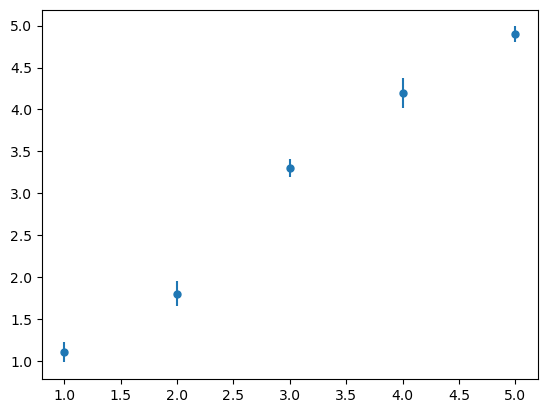

In [3]:
plt.errorbar(x, y, yerr=sigma, fmt='o', ms=5)

The solution to $a$ and $b$ are given by, $$a = \frac{1}{\Delta}(S_{xx}S_y - S_x S_{xy}), b = \frac{1}{\Delta}(S S_{xy} - S_x S_y)$$ where $$\Delta = S S_{xx} - S_x^2$$ $$S = \sum_i w_i$$ $$S_x = \sum_i x_i w_i$$ $$S_y = \sum_i y_i w_i$$ $$S_{xx} = \sum_i x_i^2 w_i$$ $$S_{xy} = \sum_i x_i y_i w_i$$ and $$w_i = \frac{1}{\sigma_i^2}$$  The variances in $a$ and $b$ and the covariance are give by, $$\sigma_a^2 = \frac{S_{xx}}{\Delta}, \sigma_b^2 = \frac{S}{\Delta}, \sigma_{ab} = \frac{-S_x}{\Delta}$$

In [4]:
w = 1./sigma**2
#S = len(x) * w  # if sigma = constant
S = np.sum(w)
Sx = np.sum(w * x)
Sy = np.sum(w * y)    
Sxx = np.sum(w * x * x)
Sxy = np.sum(w * x * y)
Delta = Sxx * S - Sx**2
a = (Sxx * Sy - Sx * Sxy) / Delta
b = (Sxy * S - Sx * Sy) / Delta
siga  = np.sqrt(Sxx / Delta)
sigb  = np.sqrt(S / Delta)
covab = -Sx / Delta

print("y intercept = %8.4f +/- %8.4f" %(a, siga))
print("      slope = %8.4f +/- %8.4f" %(b, sigb))
print(" covariance = %8.4f" %covab)

y intercept =   0.1590 +/-   0.1259
      slope =   0.9659 +/-   0.0349
 covariance =  -0.0040


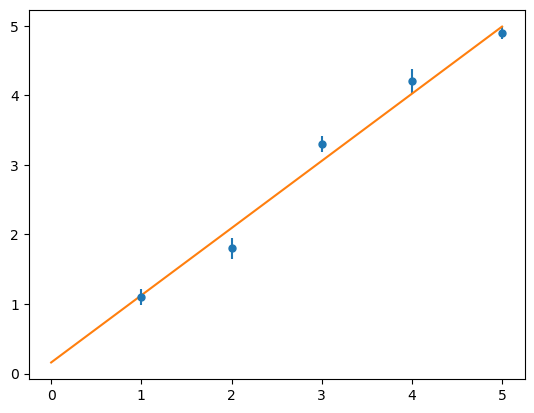

In [5]:
plt.errorbar(x, y, yerr=sigma, fmt='o', ms=5)

xgrid = np.linspace(0,5,201)
ymodel = a+b*xgrid

plt.plot(xgrid, ymodel)

The values for $a$, $b$, $\sigma_a$, $\sigma_b$, and $\sigma_{ab}$ represent the joint probability distribution of two parameters, which is given by a multivariate gaussian probability distribution function.  The parameters of this PDF are the centers, $$\vec{\mu} = \begin{pmatrix} a \\ b \end{pmatrix}$$ and covariance matrix, $$\vec{\Sigma} = \begin{pmatrix} \sigma_a^2 & \sigma_{ab} \\ \sigma_{ab} & \sigma_b^2 \end{pmatrix}$$  The various methods are in `scipy.stats.multivariate_normal` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

In [6]:
from scipy import stats

Text(0, 0.5, 'b')

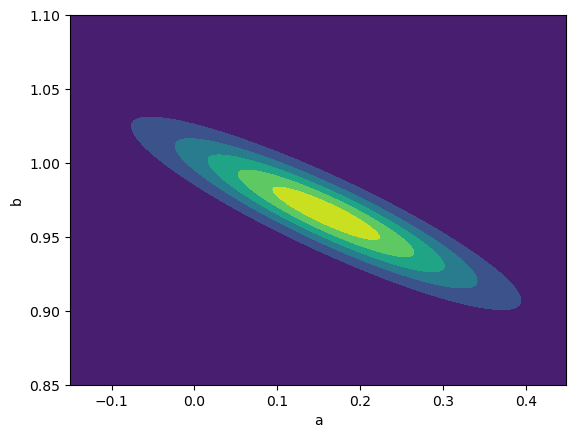

In [7]:
# For m = 2 dimensions, you need to create a grid of x,y values,
# which you can compute the PDF on.

x, y = np.mgrid[-0.15:0.45:0.001, 0.85:1.1:0.001]
pos  = np.dstack((x, y))

means  = [a, b]
covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()
ax.contourf(x, y, pdf)
ax.set_xlabel('a')
ax.set_ylabel('b')

Another representation in 3D.

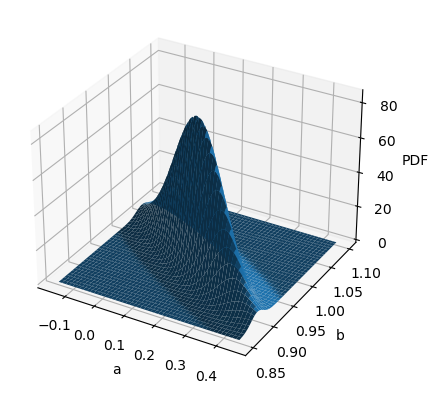

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, pdf)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('PDF')

plt.show()